# Financial Econometrics I: Homework 1

Team Member:

Lin Zhang : 15845542@fsv.cuni.cz

Weiwei Qu : 51014941@fsv.cuni.cz

# Problem 2

##### Consider 2 processes. The firrst one is given by the formula:

$$p_{t}= p_{t-1} + e_{t} + e_{t-1}, $$


##### where $e_{t}$  is an i.i.d N(0, 4) distributed sequence.

##### The second process is given by:

$$r_{t}= r_{t-1} + e_{t}, $$

##### where $e$ follows a random walk:

$$e_{t}= \mu + e_{t-1} + n_{t}, $$


##### where $n_{t}$ is an i.i.d N(0; 1) distributed sequence, cov($n_{t},e_{t-k}$) = 0 for all t, and k.

In [28]:
# setup environment
Sys.setenv(LANG = "en")
library(repr)
#install.packages('tseries')
library(tseries)
options(repr.plot.width = 8, repr.plot.height = 6)

Warning message:
"package 'tseries' was built under R version 3.6.3"Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


##### 1. Compute theoretical mean, and variance for both processes $p_{t}$ and$r_{t}$. Is any of the processes stationary in terms of mean and variance? Which process has a constant variance?

In [23]:
# Simulate p
l <- 501
#e <- rnorm(l) 
p_e <- rnorm(l, 0, sqrt(4)) 
#simulate noise

p_nd <- vector()
p_nd[1] <- 0 #initial value
for (i in 2 : l){
    p_nd[i] <- p_nd[i-1] + p_e[i] + p_e[i-1]
}


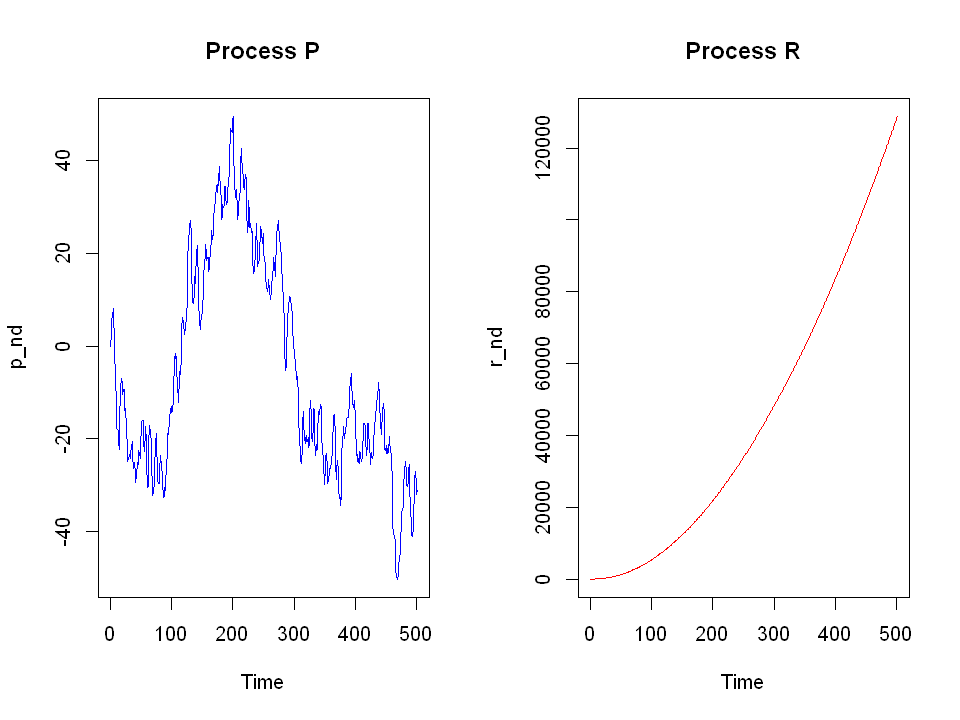

In [39]:
# Simulate r
#r(t) = r(t-1) + e(t) 

# Simulate e random walk
# e(t)= u + e(t-1) + n(t)

r_nd <- vector()
r_nd[1] <- 0 #initial value
e_nd <- vector()
n_e <- rnorm(l) #simulate noise
e_nd[1] <- 0 #initial value
u <- 1
for (i in 2 : l){
    e_nd[i] <- u + e_nd[i-1] + n_e[i]
    r_nd[i] <- r_nd[i-1] + e_nd[i]
}

par(mfrow = c(1, 2))

plot.ts(p_nd,col='blue', main='Process P')
plot.ts(r_nd,col='red', main='Process R')

##### 2. Compute Cov($e_{t}$, $e_{t-1}$) for both processes.

In [26]:
# covariance of process p

cov(p_e, p_e) 

[1] 3.94971

##### 3. Simulate 1000 realizations of length 500 for both processes $p_{t}$ and $r_{t}$ (i.e. simulate a random realization of each process of length T = 500, repeat 1000 times) with following parameters $\mu$ = 1; $p_{0}$ =  $r_{0}$  = 25; $e_{0}$ = 0.

In [31]:
# Simulate process p

l <- 501
p_rws <- matrix(ncol = 1000, nrow = l)
# 1000 columns, 500 rows, 1000 obvervations
for (j in 1 : ncol(p_rws)){
  e <- rnorm(l, 0, sqrt(4)) 
  p_rws[1, j] <- 25
  for (i in 2 : l){
    p_rws[i, j] <- p_rws[i-1, j] + e[i] + e[i-1]
}}

head(p_rws)

25.00000,25.00000,25.00000,25.00000,25.00000,25.00000,25.00000,25.00000,25.00000,25.00000,...,25.00000,25.00000,25.00000,25.00000,25.00000,25.00000,25.00000,25.00000,25.00000,25.00000
27.19053,24.58296,23.59228,24.52319,21.98332,24.61578,27.49471,24.58073,21.48693,27.64561,...,28.60256,26.50372,26.57369,28.22002,26.02513,24.34256,24.30260,28.08016,27.85779,23.83685
32.57874,27.34126,25.23894,24.11111,19.49867,19.97842,32.20043,23.71050,20.74552,27.89668,...,27.65514,22.17177,30.43684,28.63173,27.75835,23.27883,22.49569,30.34154,30.29190,24.51432
40.00984,32.36463,26.97278,21.57944,19.49653,18.88554,35.85751,24.68502,18.94013,25.80746,...,29.56409,20.05185,31.58574,27.62821,31.65302,24.01622,22.44838,32.20957,35.24666,23.96167
43.54686,30.84794,28.19614,21.76025,22.38589,18.17164,38.85450,27.61435,19.34088,26.37634,...,30.86917,18.82262,35.30013,30.10085,34.88779,26.57461,25.38418,31.14148,36.97483,25.94204
45.87016,25.55139,28.73477,19.11828,17.71366,13.70566,39.27986,29.24427,19.02365,24.68444,...,25.88053,16.82585,39.83860,35.51067,34.97326,29.06284,28.30535,30.42058,39.10300,27.55193


In [ ]:
# computer p200

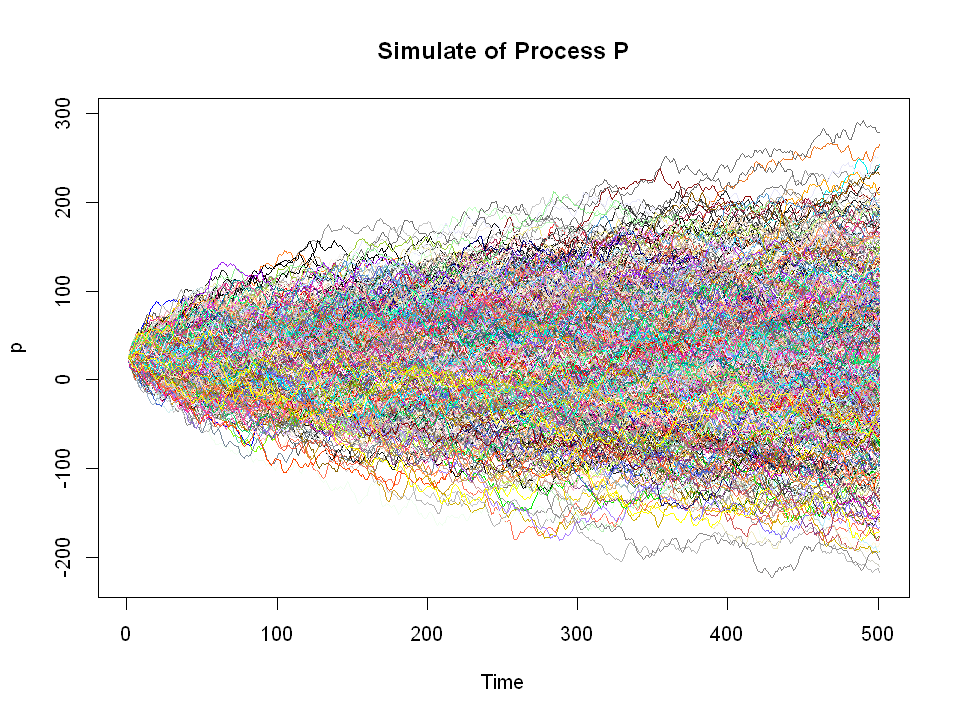

In [34]:
plot.ts(p_rws[, 1], ylim = c(min(p_rws),max(p_rws)), ylab = 'p', main='Simulate of Process P')
for (j in 2:ncol(p_rws)){
   lines(p_rws[, j], col = colors()[j])   
}

In [40]:
# Simulate process r

l <- 501
u <- 1
e_nd <- vector()
r_rws <- matrix(ncol = 1000, nrow = l)
# 1000 columns, 500 rows, 1000 obvervations
for (j in 1 : ncol(r_rws)){
     
  n_e <- rnorm(l) #simulate noise
  e_nd[1] <- 0 #initial value
  r_rws[1, j] <- 25
  for (i in 2 : l){
    e_nd[i] <- u + e_nd[i-1] + n_e[i]
    r_rws[i, j] <- r_rws[i-1, j] + e_nd[i]
}}

head(r_rws)

25.00000,25.00000,25.00000,25.00000,25.00000,25.00000,25.00000,25.00000,25.00000,25.00000,...,25.00000,25.00000,25.00000,25.00000,25.00000,25.00000,25.00000,25.00000,25.00000,25.00000
25.27994,27.43813,26.14115,28.32137,25.99736,27.10398,26.41550,24.00647,24.87360,25.68200,...,26.55094,25.88164,25.41673,26.47277,24.88635,26.14694,25.04729,25.25773,28.92532,26.55289
25.11542,31.37408,28.19101,32.54097,28.74883,29.92834,30.29097,22.36342,27.67284,28.83627,...,28.39754,27.54797,25.55682,29.81256,27.74882,27.13752,25.25209,25.70793,32.21108,28.75818
25.44775,34.20439,31.89244,38.32014,34.12124,33.07295,34.91213,22.30289,30.72568,34.96594,...,30.95546,29.97982,26.53888,31.33286,31.08594,28.50078,26.89200,27.41511,37.08407,31.76945
26.35979,38.05691,37.70036,45.75258,41.98110,36.63118,40.26755,23.98768,35.82050,42.80925,...,35.13485,33.91367,28.90607,32.38796,35.63159,30.28746,29.27105,30.62940,44.48065,34.99779
28.29849,43.77113,45.62621,54.27976,50.75592,41.25504,47.55543,26.80671,41.81043,51.89447,...,40.61432,38.56231,32.16617,35.82078,40.98607,33.64956,32.11797,35.49399,54.12184,39.95752


In [ ]:
# Computer r400

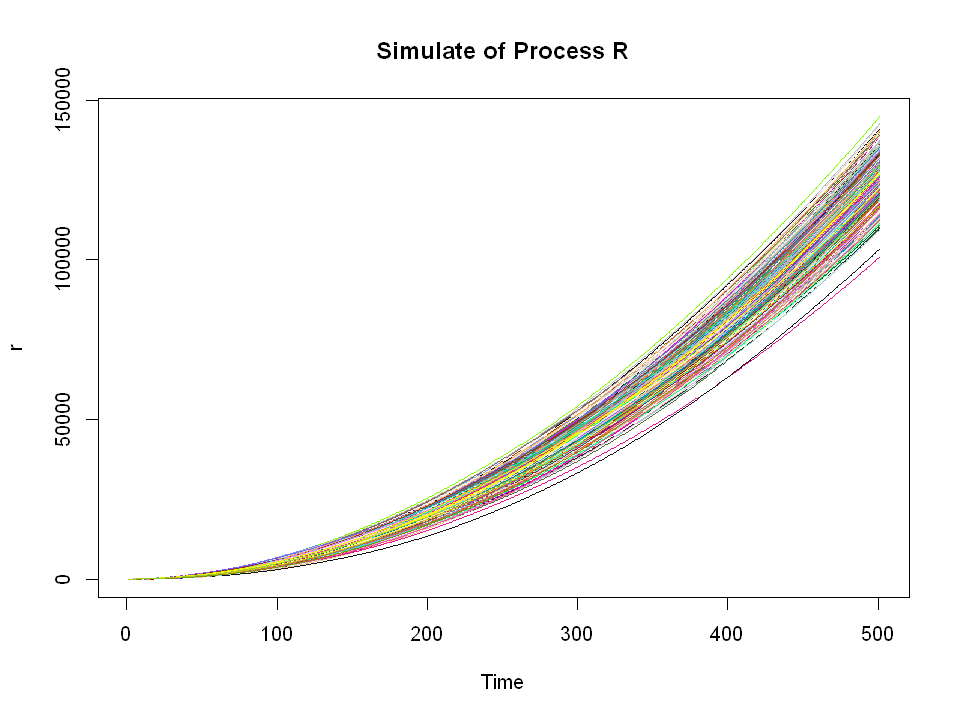

In [42]:
# plot simulate process r
plot.ts(r_rws[, 1], ylim = c(min(r_rws),max(r_rws)), ylab = 'r', main='Simulate of Process R')
for (j in 2:ncol(r_rws)){
   lines(r_rws[, j], col = colors()[j])   
}